# Experience data for machine learning

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from src import ml_exp

In [26]:
data = ml_exp.get_data(use_cache=True, date='2019-04-21')

Using cached data...


  0%|          | 602/204133 [00:00<00:33, 6019.52it/s]

Augmenting data...
Scanning students...
Removing junk...


100%|██████████| 204133/204133 [30:09<00:00, 112.80it/s]


Writing adapted data back to json...


In [47]:
len(data)

407375

## Correlations between Score and Accuracy

The idea was to predict score as a way to investigate learning. This relies on the assumption that score is a good proxy of learning - i.e. that it is correlated with learning rather than gameplay.

The following attempt to investigate this by taking all experience records (Xian and GuangDong) that have `A` in their experiences, calculating an accuracy for these, and investigating their correlation with score.

### All Scoring Models

In [28]:
acc_data = [x for x in data if 'accuracy' in x.keys()]

Basic stats:
	Pearson Correlation: 0.5690749694066567 (0.0)
	Scores:
		Mean: 86.23274030801912
		Std: 19.33064093220567
	Accuracies:
		Mean: 0.8203066038278921
		Std: 0.22547182741273794


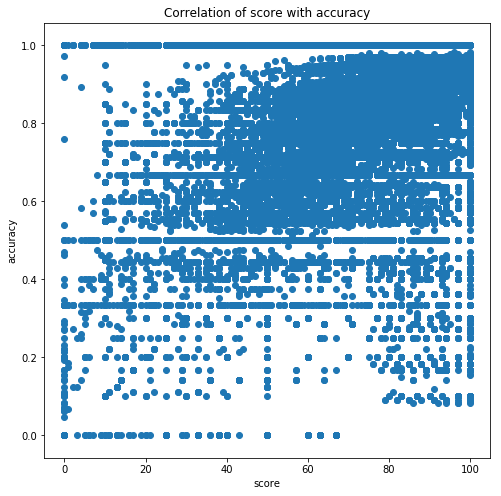

In [29]:
ml_exp.score_vs_acc(acc_data)

### Wheel

Basic stats:
	Pearson Correlation: 0.7203506499830928 (0.0)
	Scores:
		Mean: 87.5130425869933
		Std: 16.71708160647929
	Accuracies:
		Mean: 0.8366260931391784
		Std: 0.18446416789595146


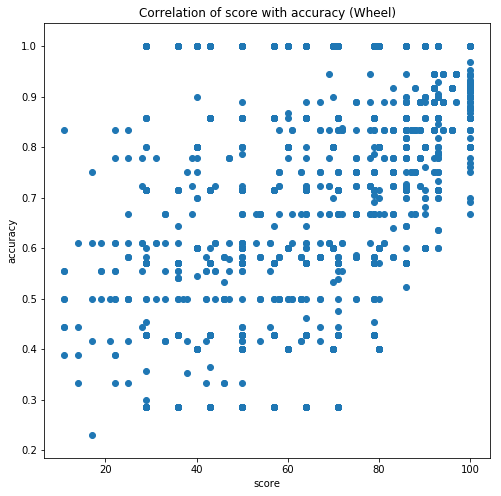

In [31]:
mod = 'Wheel'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

### Blast

Basic stats:
	Pearson Correlation: 0.6694633419946898 (9.284636695636362e-307)
	Scores:
		Mean: 82.47627118644068
		Std: 15.867975840742579
	Accuracies:
		Mean: 0.7611006778061863
		Std: 0.20107384570402365


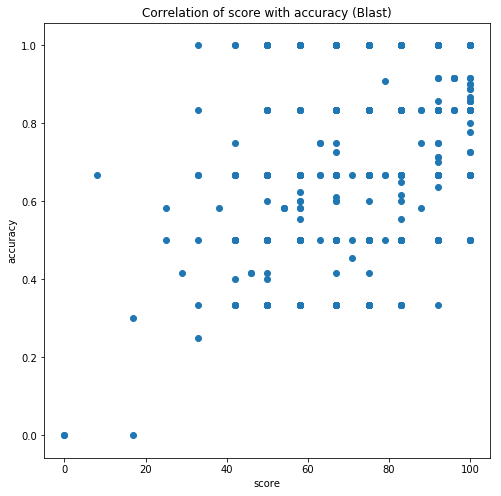

In [33]:
mod = 'Blast'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

### Song

Basic stats:
	Pearson Correlation: nan (nan)
	Scores:
		Mean: 78.0
		Std: 0.0
	Accuracies:
		Mean: 1.0
		Std: 0.0


/home/hanshan/anaconda3/envs/dyn/lib/python2.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


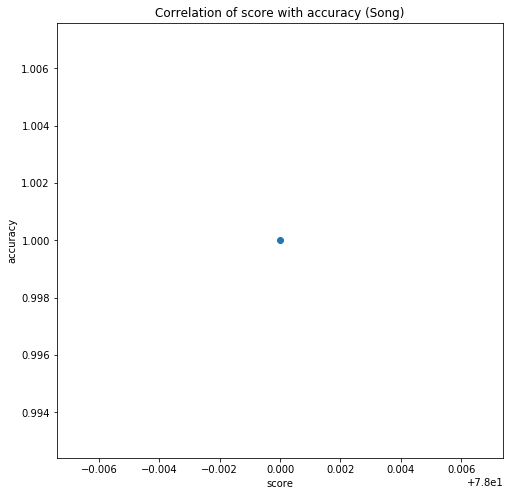

In [34]:
mod = 'Song'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

### Poster

Basic stats:
	Pearson Correlation: 0.5299850541353155 (0.0)
	Scores:
		Mean: 95.41823444283646
		Std: 6.035773401476542
	Accuracies:
		Mean: 0.7705337717176416
		Std: 0.23929003460449152


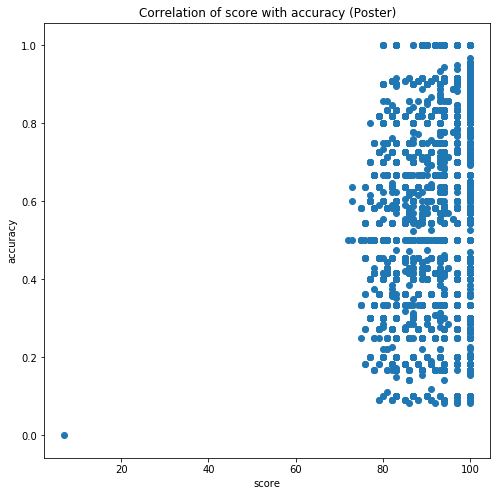

In [35]:
mod = 'Poster'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

### Quiz

Basic stats:
	Pearson Correlation: 0.9279953791842162 (0.0)
	Scores:
		Mean: 84.41300145574303
		Std: 23.471570094411437
	Accuracies:
		Mean: 0.8598182726622218
		Std: 0.2277795803124093


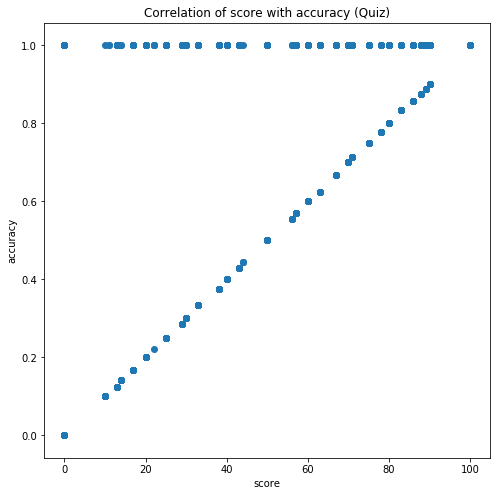

In [36]:
mod = 'Quiz'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

Strange there would be any differences here? Maybe an analysis of individual cases will tell the story...

In [45]:
def roundup(acc):
    return int(round(acc * 100, 0))

X = [e for e in _data if roundup(e['accuracy']) != e['score']]
len(X)

8799

In [46]:
X[0]

{'accuracy': 0.9,
 'class': 'ZKEPNZ',
 'duration': 57,
 'experience': [{u's': 12, u't': 12, u'w': u'cat', u'x': u'A'},
  {u'm': u'singular', u's': 12, u't': 12, u'w': u'plural', u'x': u'A'},
  {u's': 4.1, u't': 18.5, u'w': u'dog', u'x': u'A'},
  {u's': 4.1, u't': 18.5, u'w': u'plural', u'x': u'A'},
  {u's': 3.6, u't': 22.1, u'w': u'dog', u'x': u'A'},
  {u's': 3.6, u't': 22.1, u'w': u'singular', u'x': u'A'},
  {u's': 3.1, u't': 25.2, u'w': u'dog', u'x': u'A'},
  {u's': 3.1, u't': 25.2, u'w': u'plural', u'x': u'A'},
  {u's': 4.9, u't': 30.1, u'w': u'cat', u'x': u'A'},
  {u's': 4.9, u't': 30.1, u'w': u'singular', u'x': u'A'}],
 'is_preview': False,
 'level': u'P',
 'school': '\xe5\x93\x81\xe6\xa0\xbc\xe6\x84\x8f\xe6\xa0\x91',
 'school_group': 'Xian',
 'score': 100,
 'scoring_model': u'Voice',
 'teacher': 'ZGPBMQ',
 'timestamp': 1543036417795,
 'unit_module': u'0208',
 'user': u'QOLEMM'}

Seems they got 9/10 yet the score is 100?

### Fountain

Basic stats:
	Pearson Correlation: 0.5367084599295128 (0.0)
	Scores:
		Mean: 71.29751285549375
		Std: 18.771042485731055
	Accuracies:
		Mean: 0.8483996260382729
		Std: 0.15949711884826842


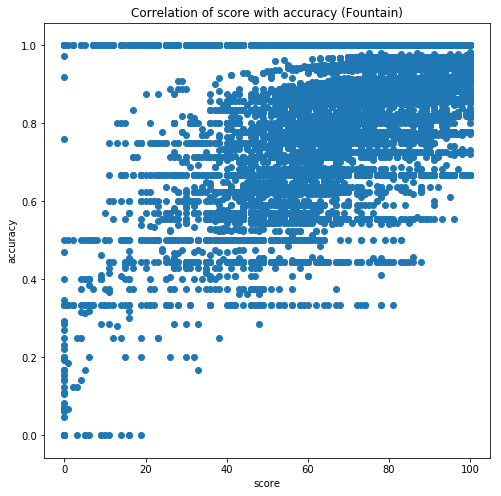

In [37]:
mod = 'Fountain'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

### Aquarium

Basic stats:
	Pearson Correlation: 0.7858975104509337 (3.5634134976848213e-206)
	Scores:
		Mean: 99.70684371807967
		Std: 1.9162399733417939
	Accuracies:
		Mean: 0.9928872880609347
		Std: 0.04523114409047695


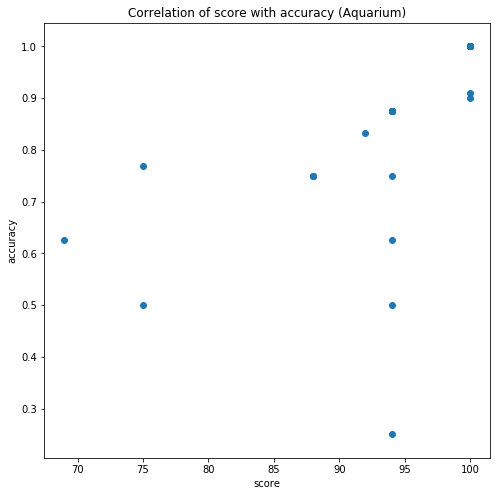

In [38]:
mod = 'Aquarium'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

### Traffic

Basic stats:
	Pearson Correlation: 0.7333972052811394 (0.0)
	Scores:
		Mean: 74.94024122807018
		Std: 27.795891071669654
	Accuracies:
		Mean: 0.8231378360435511
		Std: 0.1758234511080919


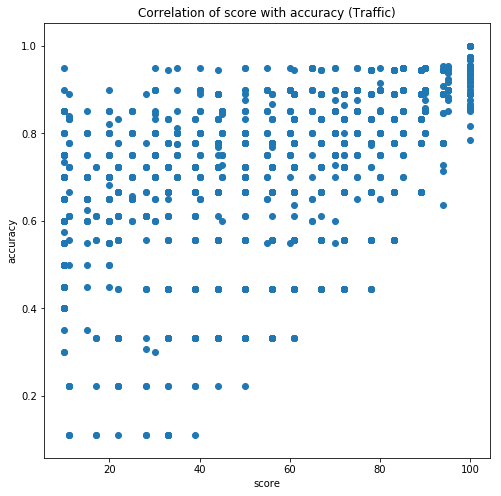

In [39]:
mod = 'Traffic'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)

### Voice

Basic stats:
	Pearson Correlation: 0.7228800787749324 (0.0)
	Scores:
		Mean: 85.77263233275646
		Std: 19.12811252419607
	Accuracies:
		Mean: 0.7459765779335576
		Std: 0.2891630854953566


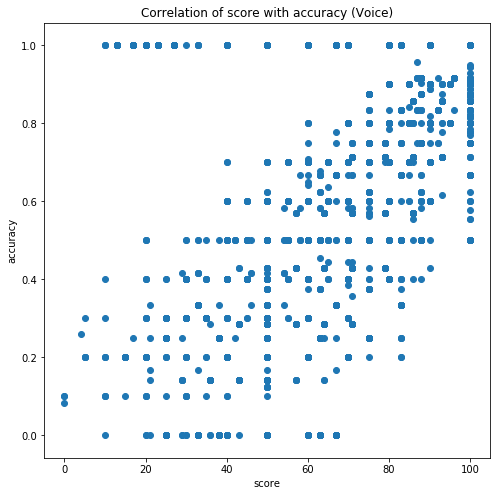

In [40]:
mod = 'Voice'
_data = [e for e in acc_data if e['scoring_model'] == mod]
ml_exp.score_vs_acc(_data, mod)